In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from aging.plotting import format_plots, PlotConfig, save_factory, figure, legend, format_pizza_plots
from collections import Counter
from matplotlib.lines import Line2D

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc
from operator import add
from tqdm.auto import tqdm
from functools import reduce
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.spatial.distance import squareform, pdist
from sklearn.metrics import silhouette_score
from aging.plotting import format_plots, figure, save_factory, PlotConfig, legend, add_identity

In [3]:
from matplotlib.colors import LinearSegmentedColormap
# Define the color map
colors = ['#d94801','white','#008C8D']
custom_cmap = LinearSegmentedColormap.from_list("custom_purples", colors, N=256)
cmmf=custom_cmap

colors = ['#dadaeb','#6a51a3']
custom_cmap = LinearSegmentedColormap.from_list("custom_purples", colors, N=256)
cma=custom_cmap

colors = ['white','gray']
custom_cmap = LinearSegmentedColormap.from_list("custom_purples", colors, N=256)
cma=custom_cmap

colors = ['#ccece6','#99d8c9','#66c2a4','#41ae76','#238b45','#006d2c']
cml = sns.blend_palette(colors, n_colors=256, as_cmap=True)

# Define the color map
colors = ['#fee6ce','#d94801']
custom_cmap = LinearSegmentedColormap.from_list("custom_purples", colors, N=256)
cmf=custom_cmap

colors = ['#c7eae5','#008C8D']
custom_cmap = LinearSegmentedColormap.from_list("custom_purples", colors, N=256)
cmm=custom_cmap

In [4]:
def mm_norm_col(column):
    return (column - column.min()) / (column.max() - column.min())

In [5]:
## arrange data
keep_syllables = np.loadtxt('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/to_keep_syllables_raw.txt', dtype=int)

male_df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/ontogeny_males_raw_usage_matrix_v00.parquet').astype(float)
male_df = male_df[keep_syllables]
m_df= male_df.groupby(['age','uuid']).mean()

## arrange data
female_df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/ontogeny_females_raw_usage_matrix_v00.parquet').astype(float)
female_df = female_df[keep_syllables]
f_df= female_df.groupby(['age','uuid']).mean()
f_df = f_df.query('age<100')

# for female:
f_df= female_df.groupby(['age','uuid']).mean()
# Update age value to 52 for rows with uuid in the list
uuids = ['f1d5dce5-f5cf-4b03-b07d-d9b8c1f034b0','6fa50ac7-6d49-4ef9-9059-3d90bdd8c5d4','e9e05da8-fc59-40f3-a9c8-f57c492c6141','327e7fa1-2237-43d2-b25f-c1801912df33']
f_df.reset_index(inplace=True)
f_df.loc[f_df['uuid'].isin(uuids), 'age'] = 52
# Set the index back
f_df.set_index(['age', 'uuid'], inplace=True)

In [6]:
'''
# use only common ages
f_ages = f_df.index.get_level_values('age').unique().to_numpy()
m_ages = m_df.index.get_level_values('age').unique().to_numpy()
cages = list(np.intersect1d(f_ages,m_ages))
if 90 in cages:
    cages.remove(90)
    
m_data = m_df.loc[m_df.index.get_level_values('age').isin(cages)]
m_data['sex'] = 'm'
m_data.set_index('sex',inplace=True,append=True)

f_data = f_df.loc[f_df.index.get_level_values('age').isin(cages)]
f_data['sex'] = 'f'
f_data.set_index('sex',inplace=True,append=True)

data=pd.concat([m_data,f_data])

# use the same number of mice per age - only age 80

# Get indices of rows where age is 80
indices = m_data[m_data.index.get_level_values('age') == 80].index
# Choose a random index
np.random.seed(0)
random_index = np.random.choice(indices)
# Remove the row with the selected index
m_data = m_data.drop(random_index)
'''

"\n# use only common ages\nf_ages = f_df.index.get_level_values('age').unique().to_numpy()\nm_ages = m_df.index.get_level_values('age').unique().to_numpy()\ncages = list(np.intersect1d(f_ages,m_ages))\nif 90 in cages:\n    cages.remove(90)\n    \nm_data = m_df.loc[m_df.index.get_level_values('age').isin(cages)]\nm_data['sex'] = 'm'\nm_data.set_index('sex',inplace=True,append=True)\n\nf_data = f_df.loc[f_df.index.get_level_values('age').isin(cages)]\nf_data['sex'] = 'f'\nf_data.set_index('sex',inplace=True,append=True)\n\ndata=pd.concat([m_data,f_data])\n\n# use the same number of mice per age - only age 80\n\n# Get indices of rows where age is 80\nindices = m_data[m_data.index.get_level_values('age') == 80].index\n# Choose a random index\nnp.random.seed(0)\nrandom_index = np.random.choice(indices)\n# Remove the row with the selected index\nm_data = m_data.drop(random_index)\n"

In [7]:
#average and normalize male
m_data = m_df.copy()
avg_m_df = m_data.groupby(['age']).mean()
# normalize the data
m_norm = mm_norm_col(m_data)
avg_m_norm = mm_norm_col(avg_m_df)

#average and normalize female
f_data=f_df.copy()
avg_f_df = f_data.groupby(['age']).mean()
# normalize the data
f_norm = mm_norm_col(f_data)
avg_f_norm = mm_norm_col(avg_f_df)

data=pd.concat([m_data,f_data])

In [8]:
## for maels

In [9]:
df = m_data.copy()

In [10]:
from sklearn.cross_decomposition import PLSRegression

In [11]:
reg = PLSRegression(n_components=2)
reg.fit(df, df.index.get_level_values('age').to_numpy()[:, None])

PLSRegression()

In [12]:
scores = reg.transform(df)
scores_df = pd.DataFrame(scores, index=df.index)
scores_df['age'] = df.index.get_level_values('age')

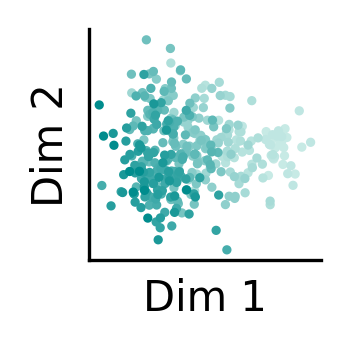

In [13]:
fig = figure(1, 1)
ax = fig.gca()
ax.scatter(scores_df[0], scores_df[1], c=scores_df['age'], cmap=cmm, s=1.5)
ax.set(xticks=[], yticks=[], xlabel="Dim 1", ylabel="Dim 2")
sns.despine()

In [14]:
c = PlotConfig()
fig.savefig(c.dana_save_path / "fig2"/ 'male_PLS.pdf')

In [15]:
df = f_data.copy()

In [16]:
from sklearn.cross_decomposition import PLSRegression

In [17]:
reg = PLSRegression(n_components=2)
reg.fit(df, df.index.get_level_values('age').to_numpy()[:, None])

PLSRegression()

In [18]:
scores = reg.transform(df)
scores_df = pd.DataFrame(scores, index=df.index)
scores_df['age'] = df.index.get_level_values('age')

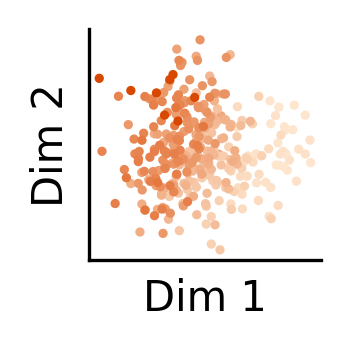

In [19]:
fig = figure(1, 1)
ax = fig.gca()
ax.scatter(scores_df[0], scores_df[1], c=scores_df['age'], cmap=cmf, s=1.5)
ax.set(xticks=[], yticks=[], xlabel="Dim 1", ylabel="Dim 2")
sns.despine()

In [20]:
c = PlotConfig()
fig.savefig(c.dana_save_path / "fig2"/ 'female_PLS.pdf')